In [65]:
import h2o
h2o.init()            #uses all cores by default
h2o.remove_all()      #clean slate, in case cluster was already running

H2O cluster uptime:,9 days 3 hours 22 minutes 30 seconds 514 milliseconds
H2O cluster version:,3.8.2.3
H2O cluster name:,H2O_started_from_python_joe_igy224
H2O cluster total nodes:,1
H2O cluster total free memory:,631.7 MB
H2O cluster total cores:,1
H2O cluster allowed cores:,1
H2O cluster healthy:,True
H2O Connection ip:,127.0.0.1
H2O Connection port:,54321
H2O Connection proxy:,None


In [66]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
import numpy as np

df = h2o.import_file('FP_movies.psv')
print df.shape #(rows,columns)
train, test = df.split_frame([0.8], seed=63)
print len(train), len(test)


Parse Progress: [##################################################] 100%
(7071, 17)
5666 1405


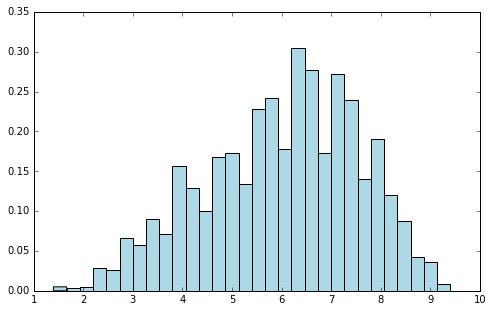

In [67]:
%matplotlib inline
from pylab import hist
import matplotlib


py_df =  df['rtAllCriticsRating'].as_data_frame(use_pandas=False)
py_df = py_df[1:3000]
#print len(py_df[2])
ratings = [float(row[0]) for row in py_df[1:]]
hist(ratings, bins=30, color='lightblue', normed=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8, 5)

In [68]:
train.head(5)

id,title,year,country,directorName,Actor1,Actor2,Actor3,rtAllCriticsRating,MovieStarPower,MovieStarPowerWCntry,AudienceRating,StarAud,Genre1,Genre2,Genre3,Actor1NameEndsInA
2,Jumanji,1995,USA,Joe Johnston,Robin Williams,Bonnie Hunt,Kirsten Dunst,5.6,159,52.47,3.2,3.7247,Children,Fantasy,Adventure,F
11,The American President,1995,USA,Rob Reiner,Michael Douglas,Annette Bening,Martin Sheen,7,138,45.54,3.2,3.6554,Romance,Comedy,Drama,F
18,Four Rooms,1995,USA,Alexandre Rockwell,Tim Roth,Valeria Golino,Jennifer Beals,3.5,82,27.06,3.5,3.7706,Thriller,Comedy,Drama,F
20,Money Train,1995,USA,Joseph Ruben,Wesley Snipes,Woody Harrelson,Jennifer Lopez,4,152,50.16,2.7,3.2016,Crime,Action,Thriller,F
27,Now and Then,1995,USA,Lesli Linka Glatter,Christina Ricci,Thora Birch,Gaby Hoffmann,4.7,78,25.74,3.5,3.7574,Drama,Drama,Drama,T


In [69]:
test.head(5)

id,title,year,country,directorName,Actor1,Actor2,Actor3,rtAllCriticsRating,MovieStarPower,MovieStarPowerWCntry,AudienceRating,StarAud,Genre1,Genre2,Genre3,Actor1NameEndsInA
4,Waiting to Exhale,1995,USA,Forest Whitaker,Whitney Houston,Angela Bassett,Loretta Devine,5.6,52,17.16,3.3,3.4716,Romance,Comedy,Drama,F
9,Sudden Death,1995,USA,Peter Hyams,Jean-Claude Van Damme,Powers Boothe,Raymond J. Barry,5.2,75,24.75,2.6,2.8475,Action,Action,Action,F
52,Mighty Aphrodite,1995,USA,Woody Allen,Woody Allen,Helena Bonham Carter,Mira Sorvino,6.7,128,42.24,3.3,3.7224,Romance,Comedy,Drama,F
54,The Big Green,1995,USA,Holly Goldberg Sloan,Yareli Arizmendi,John Bourg,Olivia d'Abo,2.8,14,4.62,2.7,2.7462,Children,Comedy,Children,F
154,Belle de jour,1967,France,Luis Bu<0xF1>uel,Catherine Deneuve,Jean Sorel,Michel Piccoli,8.6,60,56.4,4,4.564,Drama,Drama,Drama,F


In [70]:
target_simple_Y = 'rtAllCriticsRating'
#exp_simple_X = 'MovieStarPower'
#exp_simple_X = 'MovieStarPowerWCntry'
exp_simple_X = 'StarAud'

glm_movie_simple = H2OGeneralizedLinearEstimator(
                    model_id='glm_movie_simple',
                    family='gaussian', 
                    solver='IRLSM' 
                    ,lambda_search = True
                )  

glm_movie_simple.train(exp_simple_X, target_simple_Y, training_frame=train)
glm_movie_simple


glm Model Build Progress: [##################################################] 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  glm_movie_simple

GLM Model: summary



,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,"Elastic Net (alpha = 0.5, lambda = 1.737E-4 )","nlambda = 100, lambda_max = 0.0, best_lambda = 1.737E-4",2,1,0,py_74




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 1.55575041977
R^2: 0.326792597327
Mean Residual Deviance: 1.55575041977
Null degrees of freedom: 5663
Residual degrees of freedom: 5662
Null deviance: 13089.2357133
Residual deviance: 8811.77037755
AIC: 18582.985897

Scoring History: 


,timestamp,duration,iteration,lambda,predictors,explained_deviance_train,explained_deviance_test
,2016-05-10 21:59:25,0.000 sec,0,.17E1,1,-0.0000000,nan
,2016-05-10 21:59:25,0.008 sec,0,.16E1,2,0.0315815,nan
,2016-05-10 21:59:25,0.018 sec,0,.14E1,2,0.0612508,nan
,2016-05-10 21:59:25,0.025 sec,0,.13E1,2,0.0889495,nan
,2016-05-10 21:59:25,0.034 sec,0,.12E1,2,0.1146294,nan
---,---,---,---,---,---,---,---
,2016-05-10 21:59:25,0.790 sec,0,.25E-3,2,0.3267926,nan
,2016-05-10 21:59:25,0.796 sec,0,.23E-3,2,0.3267926,nan
,2016-05-10 21:59:25,0.803 sec,0,.21E-3,2,0.3267926,nan
,2016-05-10 21:59:25,0.813 sec,0,.19E-3,2,0.3267926,nan



See the whole table with table.as_data_frame()


In [71]:
print 'RMSE: {0}'.format(np.sqrt(glm_movie_simple.mse())) 
glm_movie_simple_pred = glm_movie_simple.predict(test)

df_movie_simple_out = test[['title','StarAud','rtAllCriticsRating']].cbind(glm_movie_simple_pred)
print("GLM predictions: ")
print df_movie_simple_out.head(5)

h2o.export_file(frame=df_movie_simple_out, path='movie_SIMPLE_out.csv', force=True)

RMSE: 1.24729724595

glm prediction Progress: [##################################################] 100%
GLM predictions: 
title                StarAud    rtAllCriticsRating    predict
-----------------  ---------  --------------------  ---------
Waiting to Exhale     3.4716                   5.6    5.61492
Sudden Death          2.8475                   5.2    4.5006
Mighty Aphrodite      3.7224                   6.7    6.06272
The Big Green         2.7462                   2.8    4.31973
Belle de jour         4.564                    8.6    7.56537

[5 rows x 4 columns]

Export File Progress: [##################################################] 100%


In [72]:
output, remainder = df_movie_simple_out.split_frame([0.1], seed=63)
print len(output)
h2o.export_file(frame=output, path='movie_SIMPLE_out_SHORT.csv', force=True)


143

Export File Progress: [##################################################] 100%
